In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))
    
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

In [3]:
u_list = np.random.normal(0,1,1000)

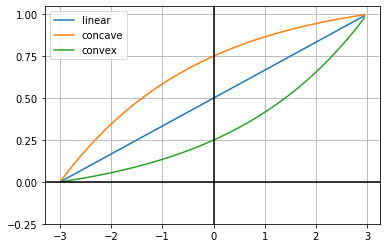

In [4]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.367,1) for x in X]
Y2 = [u(x,-0.367,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

## Optimality gap, single attribute, estimates

In [43]:
def cal_opt(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.normal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)

        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)
        u_y = us(y, a, s)
        
        max_uy = max(u_y) #maximum estimates
        max_j = u_y.index(max_uy) #index of maximum estimates
        
        #Otimality gap 
        d = (max(u_x) - u(x[max_j], a, s))/max(u_x)
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


In [3]:
from IPython.display import display, Math


In [6]:
x = Math(r"\mathbb{E}[(u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))}) - u(\boldsymbol{X}_{\kappa(u(\boldsymbol{Y}))}))/u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))})]")

In [8]:
print(display(x))

<IPython.core.display.Math object>

None


In [56]:
display(Math(r"\mathbb{E}[(u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))}) - u(\boldsymbol{X}_{\kappa(u(\boldsymbol{Y}))}))/u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))})]"))

<IPython.core.display.Math object>

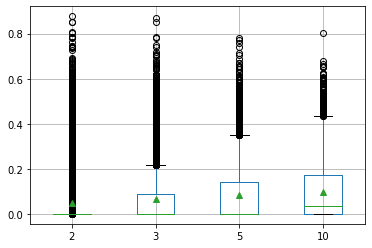

2     0.047487
3     0.065470
5     0.083906
10    0.099457
dtype: float64


In [44]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt(m, a=0)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

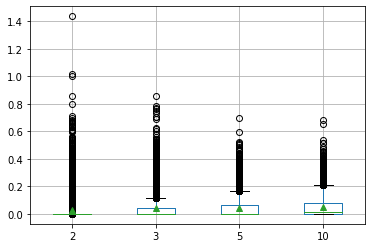

2     0.030928
3     0.039532
5     0.044162
10    0.050384
dtype: float64


In [45]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt(m, a=0.367) #concave
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

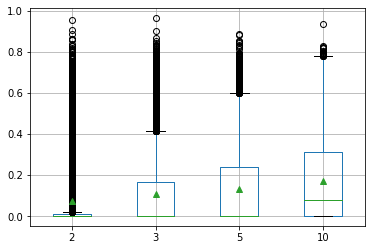

2     0.071627
3     0.105181
5     0.130711
10    0.169071
dtype: float64


In [46]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt(m, a=-0.367) #convex
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## Optimality gap, single attribute, posterior right way

In [63]:
def cal_opt_post(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.normal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)

        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*y_j
            p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance

            x_p.append(list(np.random.normal(p_mean, np.sqrt(p_std),1000)))


        #Compute $u(x_jk$) for all $j,k$
        u_x_p = [us(x, a, s) for x in x_p]

        #Compute the average $\sum_{k=1}^1000 u_(x_jk)$ to get an estimate for the expected utility $E[u(X_j)|Y_j=y_j]$
        eu = [np.mean(x) for x in u_x_p]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(u_x) - u(x[max_j], a, s))/max(u_x)
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


In [82]:
display(Math(r"\mathbb{E}[(u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))}) - u(\boldsymbol{X}_{\kappa(\boldsymbol{Z})}))/u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))})]"))

<IPython.core.display.Math object>

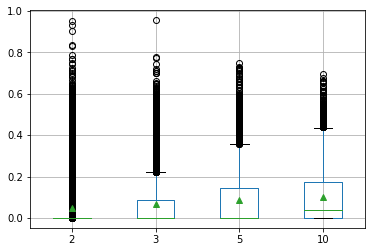

2     0.048085
3     0.066770
5     0.084262
10    0.099913
dtype: float64


In [64]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post(m, a=0) #linear
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

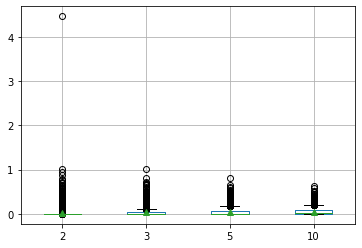

2     0.031974
3     0.039556
5     0.046206
10    0.049603
dtype: float64


In [65]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post(m, a=0.367) #concave    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

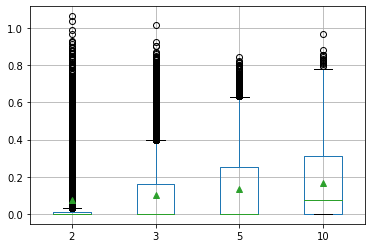

2     0.074343
3     0.103902
5     0.134451
10    0.168069
dtype: float64


In [66]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post(m, a=-0.367) #convex   
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [74]:
def cal_opt_post_wrong(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for c in range(10000):

        #Generate $m$ true values $x_j$ from the prior
        x = np.random.normal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)

        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*y_j
            x_p.append(p_mean)

        eu = [u(x,a,s) for x in x_p]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(u_x) - u_x[max_j])/max(u_x) 
        d_list.append(d)
    return d_list

In [83]:
display(Math(r"\mathbb{E}[(u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))}) - u(\boldsymbol{X}_{\kappa(\boldsymbol{\tilde{Z}})}))/u(\boldsymbol{X}_{\kappa(u(\boldsymbol{X}))})]"))

<IPython.core.display.Math object>

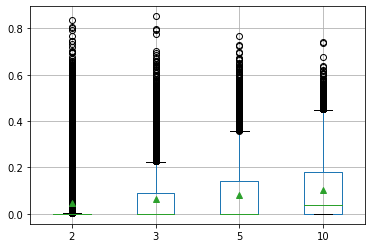

2     0.048924
3     0.065941
5     0.083566
10    0.101535
dtype: float64


In [75]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post_wrong(m, a=0) #linear
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

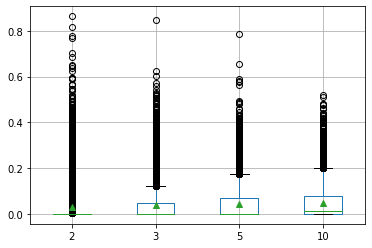

2     0.030392
3     0.040657
5     0.044311
10    0.048936
dtype: float64


In [76]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post_wrong(m, a=0.367) #concave
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

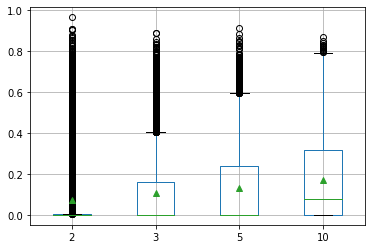

2     0.072419
3     0.105041
5     0.129286
10    0.170573
dtype: float64


In [77]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_opt_post_wrong(m, a=-0.367) #convex
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## Selection Bias - multi attribute 

In [133]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x) 
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list

# Varying number of alternatives

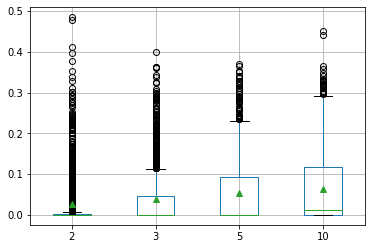

2     0.027544
3     0.037909
5     0.053388
10    0.064242
dtype: float64


In [101]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

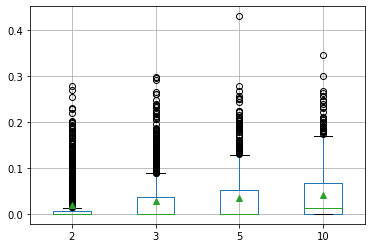

2     0.019026
3     0.028461
5     0.034045
10    0.040385
dtype: float64


In [88]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

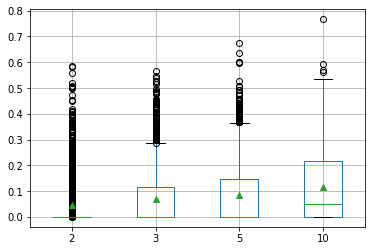

2     0.045399
3     0.070029
5     0.085377
10    0.116694
dtype: float64


In [102]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# varying number of attributes 

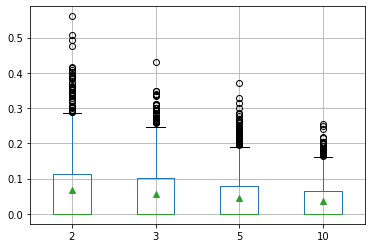

2     0.066491
3     0.056710
5     0.046012
10    0.035815
dtype: float64


In [103]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

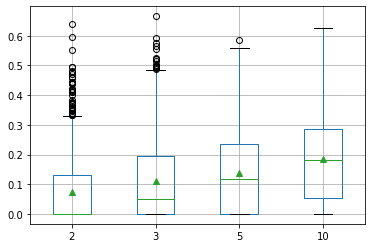

2     0.074141
3     0.110945
5     0.138438
10    0.184156
dtype: float64


In [134]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[5]*5)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

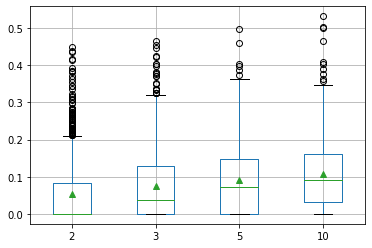

2     0.052778
3     0.076177
5     0.090864
10    0.106255
dtype: float64


In [135]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[5]*5, a=[0.367]*n)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

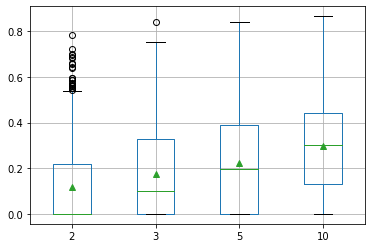

2     0.116215
3     0.175625
5     0.221371
10    0.297035
dtype: float64


In [136]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[5]*5, a=[-0.367]*n)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Optimality gap - multiattribute estimates

In [147]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_mu = (mx[max_j]-meu[max_j])/mx[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list

## overall disappointment

Varying attribute-specific estimation uncertainty 

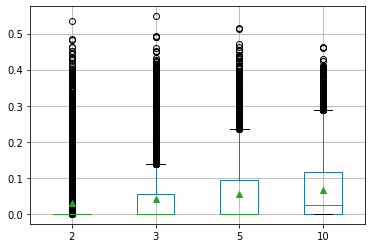

2     0.029430
3     0.042124
5     0.055018
10    0.065906
dtype: float64


In [108]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

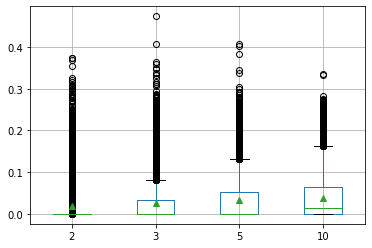

2     0.018505
3     0.025794
5     0.033191
10    0.038460
dtype: float64


In [109]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m,  a=[0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

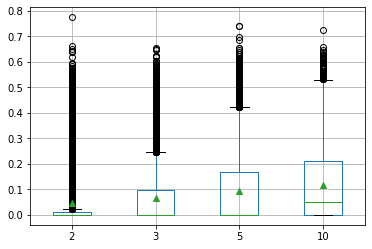

2     0.046689
3     0.067047
5     0.093742
10    0.116480
dtype: float64


In [110]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m,  a=[-0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

### modifying the estimation uncertainty

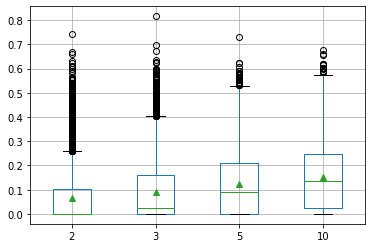

2     0.065400
3     0.092307
5     0.123205
10    0.152767
dtype: float64


In [148]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

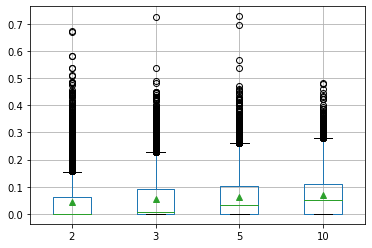

2     0.042955
3     0.054234
5     0.063084
10    0.068769
dtype: float64


In [149]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

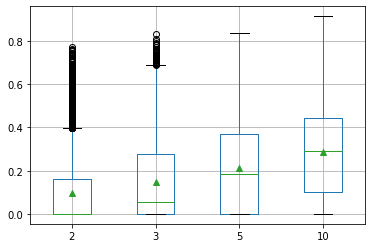

2     0.096298
3     0.149003
5     0.214506
10    0.286141
dtype: float64


In [150]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Optimality gap posterior right way

In [162]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            u_x_jp_l = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            for z in range(100):
                u_x_jp = [] #[u_1(x_j1), u_2(x_j2), ...]
                
                for i in range(n): #loop for generating posterior mu for one alternative
                    p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                    p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                    x_ji = np.random.normal(p_mean, np.sqrt(p_var),1)[0]
                    u_x_ji = u(x_ji, a[i], 1)
                    u_x_jp.append(u_x_ji)
                
                
                u_x_jp_l.append(u_x_jp) #append u_x_jp of one posterior alternative (repeated 1000 times)
            
            e = np.mean(u_x_jp_l, axis=0) # E[u(x)|y]           
            eu.append(np.dot(w, e)) #append w_i*E[u(x)|y]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


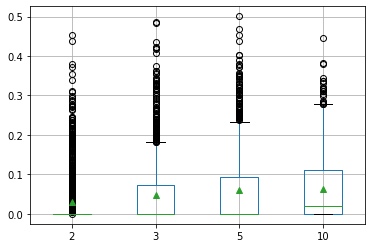

2     0.029251
3     0.048617
5     0.060281
10    0.063286
dtype: float64


In [163]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

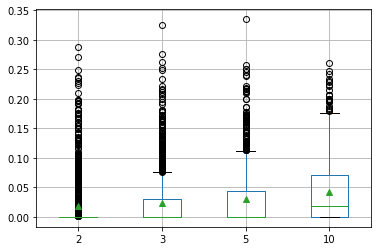

2     0.019081
3     0.024435
5     0.029953
10    0.041471
dtype: float64


In [164]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

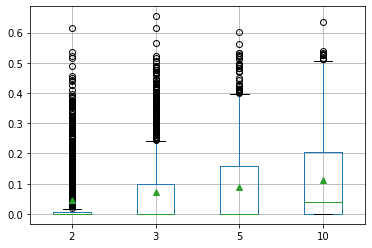

2     0.045535
3     0.072848
5     0.090183
10    0.113229
dtype: float64


In [165]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

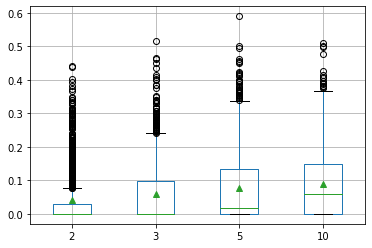

2     0.040381
3     0.058914
5     0.078402
10    0.089863
dtype: float64


In [166]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

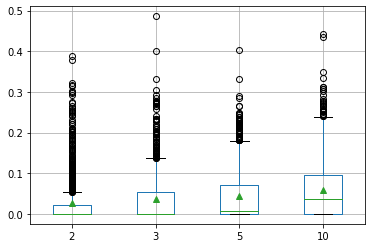

2     0.026540
3     0.036165
5     0.044253
10    0.058383
dtype: float64


In [167]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

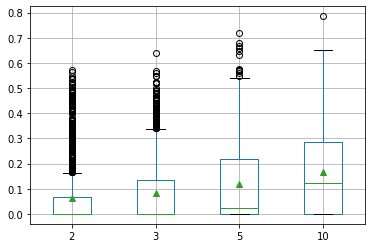

2     0.063778
3     0.082893
5     0.118522
10    0.166392
dtype: float64


In [168]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [137]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            u_x_jp_l = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            for z in range(100):
                x_jp = []
                
                for i in range(n): #loop for generating posterior mu for one alternative
                    p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                    p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                    x_jp.append(np.random.normal(p_mean, np.sqrt(p_var),1)[0])
                
                u_x_jp = cal_u(x_jp)
                u_x_jp_l.append(u_x_jp) #append u(x) of one posterior alternative (repeated 1000 times)
            
            e = np.mean(u_x_jp_l) #compute the average of 1000 u(x)|y, which is E[u(x)|y]           
            eu.append(e) #append E[u(x)|y]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


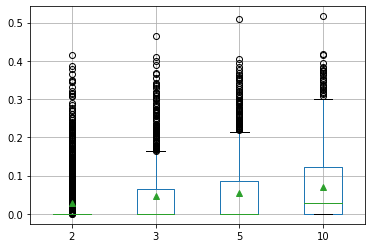

2     0.029281
3     0.046240
5     0.055512
10    0.071242
dtype: float64


In [138]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

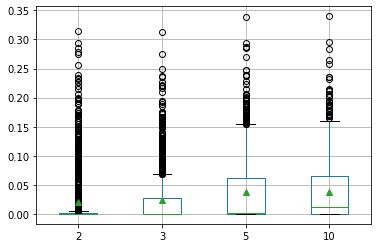

2     0.020261
3     0.024142
5     0.037716
10    0.038159
dtype: float64


In [139]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

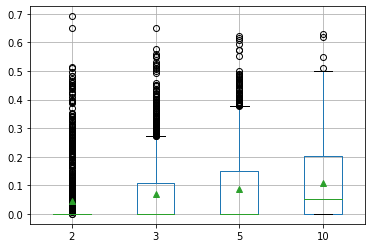

2     0.046645
3     0.071271
5     0.087394
10    0.108747
dtype: float64


In [140]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Increase the estimation uncertainty

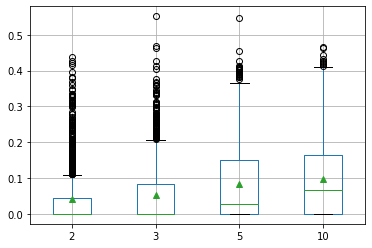

2     0.042046
3     0.052358
5     0.084104
10    0.097502
dtype: float64


In [144]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

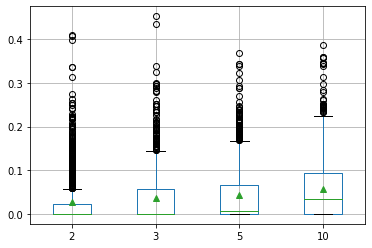

2     0.027593
3     0.037214
5     0.042657
10    0.057850
dtype: float64


In [145]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

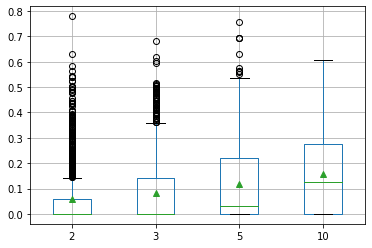

2     0.059752
3     0.082923
5     0.119771
10    0.156323
dtype: float64


In [146]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Optimality gap posterior wrong way

In [152]:
def cal_post_wrong_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    for k in range(10000):
        x = [] #place holder for alternatives
        mx = []
        eu = [] #place holder for posterior estimated utilties
        meu = []
        
        for j in range(m): #loop for generating mu alternatives
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true m u of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated m u of one alternative
            
            x_jp = []
            
            for i in range(n): #loop for generating posterior m u for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                x_p_ji = list(np.random.normal(p_mean, np.sqrt(p_var),1000)) #generate 1000 of one attribute 
                x_jp.append(np.mean(x_p_ji)) #append average of that single attribute E[Xji|Y]
                
            eu.append(cal_u(x_jp)) #calculate m u of one alternative
            ux_jp = np.array([u(x_jp[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(ux_jp)
        
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        d_mu = (mx[max_j]-x[max_j])/mx[max_j]
        d_mu_list.append(d_mu)
        
    return d_list

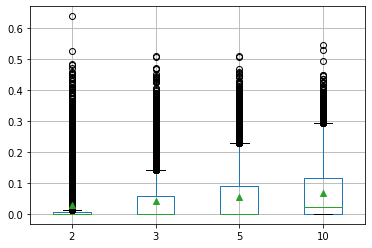

2     0.030019
3     0.042134
5     0.054418
10    0.066776
dtype: float64


In [153]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

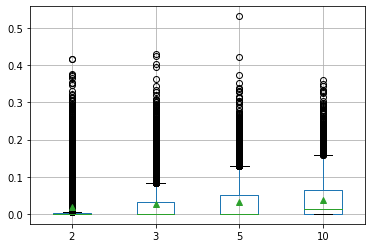

2     0.019627
3     0.026310
5     0.032314
10    0.038421
dtype: float64


In [154]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

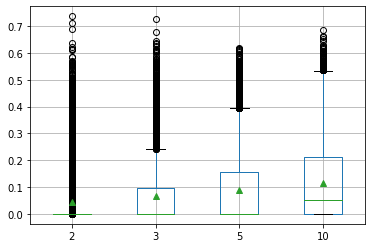

2     0.044666
3     0.065974
5     0.088355
10    0.116817
dtype: float64


In [155]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

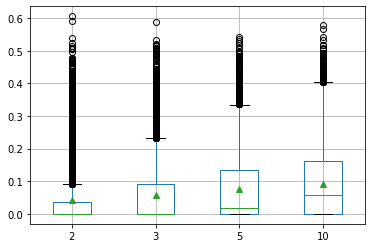

2     0.041514
3     0.056830
5     0.075981
10    0.093155
dtype: float64


In [156]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

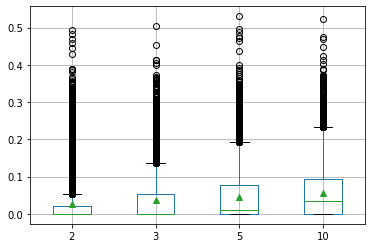

2     0.026207
3     0.036125
5     0.046701
10    0.056340
dtype: float64


In [157]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[0.367]*3, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

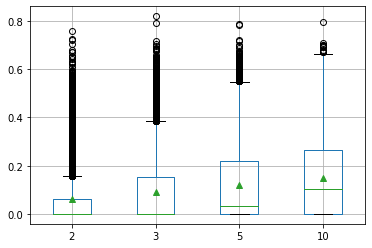

2     0.062540
3     0.089955
5     0.121276
10    0.149040
dtype: float64


In [158]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[-0.367]*3, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))